In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from imblearn.under_sampling import ClusterCentroids, CondensedNearestNeighbour, EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours, TomekLinks, AllKNN, InstanceHardnessThreshold
from imblearn.under_sampling import NearMiss, NeighbourhoodCleaningRule, OneSidedSelection, RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve,confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('indicium_imdb.csv')
dados.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [ ]:
dados.shape

(999, 16)

In [ ]:
# Filtrei os filmes com alta nota na coluna IMDB
filmes_altas_notas = dados[dados['IMDB_Rating'] >= 8.0]

In [ ]:
# Escolhendo o que tem o maior número de votos
filme_recomendado = filmes_altas_notas.sort_values(by='No_of_Votes', ascending=False).iloc[0]

In [ ]:
# O filme que eu recomendaria para as pessoas, seria o ?
print(f"O Filme que eu recomendadaria para uma pessoa que não conheço é: {filme_recomendado['Series_Title']}")
print(f"Ano de lançamento: {filme_recomendado['Released_Year']}")
print(f"Classificação etária: {filme_recomendado['Certificate']}")
print(f"Tempo de duração: {filme_recomendado['Runtime']}")
print(f"Gênero: {filme_recomendado['Genre']}")
print(f"Nota do IMDB: {filme_recomendado['IMDB_Rating']}")
print(f"Overview: {filme_recomendado['Overview']}")
print(f"Média ponderada das críticas (Meta_score): {filme_recomendado['Meta_score']}")
print(f"Diretor: {filme_recomendado['Director']}")
print(f"Atores: {filme_recomendado['Star1']}, {filme_recomendado['Star2']}, {filme_recomendado['Star3']}, {filme_recomendado['Star4']}")
print(f"Número de votos: {filme_recomendado['No_of_Votes']}")
print(f"Faturamento: {filme_recomendado['Gross']}")

O Filme que eu recomendadaria para uma pessoa que não conheço é: The Dark Knight
Ano de lançamento: 2008
Classificação etária: UA
Tempo de duração: 152 min
Gênero: Action, Crime, Drama
Nota do IMDB: 9.0
Overview: When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.
Média ponderada das críticas (Meta_score): 84.0
Diretor: Christopher Nolan
Atores: Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine
Número de votos: 2303232
Faturamento: 534,858,444


In [ ]:
print(dados.isnull().sum())



Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [ ]:

most_frequent_certificate = dados['Certificate'].mode()[0]
dados['Certificate'].fillna(most_frequent_certificate, inplace=True)


meta_score_mean = dados['Meta_score'].mean()
dados['Meta_score'].fillna(meta_score_mean, inplace=True)


dados['Gross'] = dados['Gross'].astype(str).str.replace(',', '').astype(float)


gross_mean = dados['Gross'].mean()
dados['Gross'].fillna(gross_mean, inplace=True)

print(dados.isnull().sum())

Unnamed: 0       0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


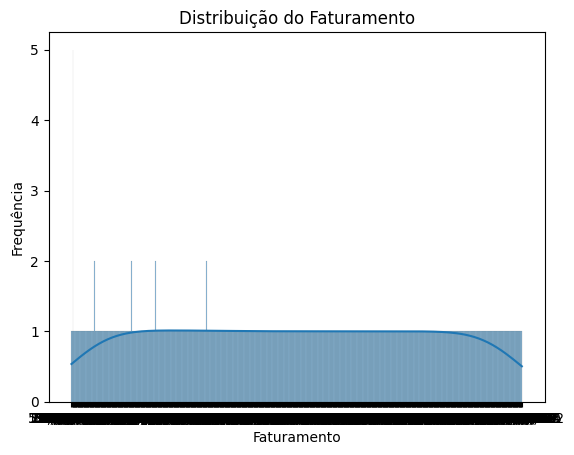

In [ ]:
# Distribuição do faturamento
sns.histplot(dados['Gross'].dropna(), kde=True)
plt.title('Distribuição do Faturamento')
plt.xlabel('Faturamento')
plt.ylabel('Frequência')
plt.show()


In [ ]:
dados.head()


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [ ]:

genre_dummies = pd.get_dummies(dados['Genre'], prefix='Genre')


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dados['Certificate_encoded'] = le.fit_transform(dados['Certificate'])


dados.drop(['Genre', 'Certificate'], axis=1, inplace=True)


dados = pd.concat([dados, genre_dummies], axis=1)


scaler = MinMaxScaler()
dados[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']] = scaler.fit_transform(dados[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']])


print(dados.head())

   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

   Runtime  IMDB_Rating                                           Overview  \
0  175 min       1.0000  An organized crime dynasty's aging patriarch t...   
1  152 min       0.8750  When the menace known as the Joker wreaks havo...   
2  202 min       0.8750  The early life and career of Vito Corleone in ...   
3   96 min       0.8750  A jury holdout attempts to prevent a miscarria...   
4  201 min       0.8125  Gandalf and Aragorn lead the World of Men agai...   

   Meta_score              Director           Star1           

In [ ]:
dados.head()

,Unnamed: 0,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,...,Genre_Horror,"Genre_Horror, Mystery, Sci-Fi","Genre_Horror, Mystery, Thriller","Genre_Horror, Sci-Fi","Genre_Horror, Thriller","Genre_Mystery, Romance, Thriller","Genre_Mystery, Sci-Fi, Thriller","Genre_Mystery, Thriller",Genre_Thriller,Genre_Western
0,1,The Godfather,1972,175 min,1.0000,An organized crime dynasty's aging patriarch t...,1.000000,Francis Ford Coppola,Marlon Brando,Al Pacino,...,False,False,False,False,False,False,False,False,False,False
1,2,The Dark Knight,2008,152 min,0.8750,When the menace known as the Joker wreaks havo...,0.777778,Christopher Nolan,Christian Bale,Heath Ledger,...,False,False,False,False,False,False,False,False,False,False
2,3,The Godfather: Part II,1974,202 min,0.8750,The early life and career of Vito Corleone in ...,0.861111,Francis Ford Coppola,Al Pacino,Robert De Niro,...,False,False,False,False,False,False,False,False,False,False
3,4,12 Angry Men,1957,96 min,0.8750,A jury holdout attempts to prevent a miscarria...,0.944444,Sidney Lumet,Henry Fonda,Lee J. Cobb,...,False,False,False,False,False,False,False,False,False,False
4,5,The Lord of the Rings: The Return of the King,2003,201 min,0.8125,Gandalf and Aragorn lead the World of Men agai...,0.916667,Peter Jackson,Elijah Wood,Viggo Mortensen,...,False,False,False,False,False,False,False,False,False,False


In [ ]:

numeric_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']


scaler = MinMaxScaler()


dados[numeric_cols] = scaler.fit_transform(dados[numeric_cols])

print(dados.head())

   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

   Runtime  IMDB_Rating                                           Overview  \
0  175 min       1.0000  An organized crime dynasty's aging patriarch t...   
1  152 min       0.8750  When the menace known as the Joker wreaks havo...   
2  202 min       0.8750  The early life and career of Vito Corleone in ...   
3   96 min       0.8750  A jury holdout attempts to prevent a miscarria...   
4  201 min       0.8125  Gandalf and Aragorn lead the World of Men agai...   

   Meta_score              Director           Star1           

In [ ]:
dados.head()

,Unnamed: 0,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,...,Genre_Horror,"Genre_Horror, Mystery, Sci-Fi","Genre_Horror, Mystery, Thriller","Genre_Horror, Sci-Fi","Genre_Horror, Thriller","Genre_Mystery, Romance, Thriller","Genre_Mystery, Sci-Fi, Thriller","Genre_Mystery, Thriller",Genre_Thriller,Genre_Western
0,1,The Godfather,1972,175 min,1.0000,An organized crime dynasty's aging patriarch t...,1.000000,Francis Ford Coppola,Marlon Brando,Al Pacino,...,False,False,False,False,False,False,False,False,False,False
1,2,The Dark Knight,2008,152 min,0.8750,When the menace known as the Joker wreaks havo...,0.777778,Christopher Nolan,Christian Bale,Heath Ledger,...,False,False,False,False,False,False,False,False,False,False
2,3,The Godfather: Part II,1974,202 min,0.8750,The early life and career of Vito Corleone in ...,0.861111,Francis Ford Coppola,Al Pacino,Robert De Niro,...,False,False,False,False,False,False,False,False,False,False
3,4,12 Angry Men,1957,96 min,0.8750,A jury holdout attempts to prevent a miscarria...,0.944444,Sidney Lumet,Henry Fonda,Lee J. Cobb,...,False,False,False,False,False,False,False,False,False,False
4,5,The Lord of the Rings: The Return of the King,2003,201 min,0.8125,Gandalf and Aragorn lead the World of Men agai...,0.916667,Peter Jackson,Elijah Wood,Viggo Mortensen,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dados_1 = []  # This should be a list of indices you want to exclude
indices = ~dados.index.isin(dados_1)  # Now dados_1 should contain indices
df_teste = dados[indices]
df_teste.head(15)

,Unnamed: 0,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,...,Genre_Horror,"Genre_Horror, Mystery, Sci-Fi","Genre_Horror, Mystery, Thriller","Genre_Horror, Sci-Fi","Genre_Horror, Thriller","Genre_Mystery, Romance, Thriller","Genre_Mystery, Sci-Fi, Thriller","Genre_Mystery, Thriller",Genre_Thriller,Genre_Western
0,1,The Godfather,1972,175 min,1.0000,An organized crime dynasty's aging patriarch t...,1.000000,Francis Ford Coppola,Marlon Brando,Al Pacino,...,False,False,False,False,False,False,False,False,False,False
1,2,The Dark Knight,2008,152 min,0.8750,When the menace known as the Joker wreaks havo...,0.777778,Christopher Nolan,Christian Bale,Heath Ledger,...,False,False,False,False,False,False,False,False,False,False
2,3,The Godfather: Part II,1974,202 min,0.8750,The early life and career of Vito Corleone in ...,0.861111,Francis Ford Coppola,Al Pacino,Robert De Niro,...,False,False,False,False,False,False,False,False,False,False
3,4,12 Angry Men,1957,96 min,0.8750,A jury holdout attempts to prevent a miscarria...,0.944444,Sidney Lumet,Henry Fonda,Lee J. Cobb,...,False,False,False,False,False,False,False,False,False,False
4,5,The Lord of the Rings: The Return of the King,2003,201 min,0.8125,Gandalf and Aragorn lead the World of Men agai...,0.916667,Peter Jackson,Elijah Wood,Viggo Mortensen,...,False,False,False,False,False,False,False,False,False,False
5,6,Pulp Fiction,1994,154 min,0.8125,"The lives of two mob hitmen, a boxer, a gangst...",0.916667,Quentin Tarantino,John Travolta,Uma Thurman,...,False,False,False,False,False,False,False,False,False,False
6,7,Schindler's List,1993,195 min,0.8125,"In German-occupied Poland during World War II,...",0.916667,Steven Spielberg,Liam Neeson,Ralph Fiennes,...,False,False,False,False,False,False,False,False,False,False
7,8,Inception,2010,148 min,0.7500,A thief who steals corporate secrets through t...,0.638889,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,...,False,False,False,False,False,False,False,False,False,False
8,9,Fight Club,1999,139 min,0.7500,An insomniac office worker and a devil-may-car...,0.527778,David Fincher,Brad Pitt,Edward Norton,...,False,False,False,False,False,False,False,False,False,False
9,10,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,0.7500,A meek Hobbit from the Shire and eight compani...,0.888889,Peter Jackson,Elijah Wood,Ian McKellen,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dados['IMDB_Rating_Category'] = pd.cut(dados['IMDB_Rating'], bins=[0, 3, 6, 9, 10], labels=['Low', 'Medium', 'High', 'Very High'])

In [ ]:
x = dados.drop(columns={'IMDB_Rating', 'IMDB_Rating_Category'}) # Remove both original and categorized rating
#O drop se utiliza para remover colunas.
y = dados['IMDB_Rating_Category'] # Use the categorized rating as the target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
object_columns = x_train.select_dtypes(include='object').columns


In [ ]:
for col in object_columns:
    # Example: Fill missing values and convert to numerical representation
    x_train[col] = x_train[col].fillna('Unknown')  # Replace missing values with 'Unknown'
    x_train[col] = x_train[col].astype('category').cat.codes  # Convert categories to numerical codes

    # Apply the same transformation to x_test
    x_test[col] = x_test[col].fillna('Unknown')
    x_test[col] = x_test[col].astype('category').cat.codes

In [ ]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_test = x_test.apply(pd.to_numeric, errors='coerce')

In [ ]:
min_max = MinMaxScaler()
min_max.fit(x_train)
x_train_norm = min_max.transform(x_train)
x_test_norm = min_max.transform(x_test)

In [ ]:
df_teste['IMDB_Rating'].value_counts()

IMDB_Rating
0.0625    157
0.1250    151
0.2500    141
0.3125    127
0.0000    123
0.1875    106
0.3750     67
0.4375     44
0.5000     31
0.5625     20
0.6250     15
0.7500      5
0.6875      5
0.8750      3
0.8125      3
1.0000      1
Name: count, dtype: int64

In [ ]:
y_train = y_train.astype('category').cat.codes

In [ ]:
random_under = RandomUnderSampler(random_state=42)
X_under, y_under = random_under.fit_resample(x_train_norm, y_train)
X_under.shape

(192, 216)

In [ ]:
y_under.value_counts()

-1    96
 0    96
Name: count, dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
X_under_imputed = imputer.fit_transform(X_under)

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_under_imputed = imputer.fit_transform(X_under)


In [ ]:
x_test_norm_imputed = imputer.transform(x_test_norm)

In [ ]:
modelo_knn2 = KNeighborsClassifier(n_neighbors=3)
modelo_knn2.fit(X_under_imputed, y_under)
y_pred = modelo_knn2.predict(x_test_norm_imputed) # Predict using imputed test data

In [ ]:
y_pred_codes = y_pred  # No need for .codes as y_pred is already numerical
y_test_codes = y_test.cat.codes

print('Acuracia:', accuracy_score(y_test_codes, y_pred_codes))
print('Revocação', recall_score(y_test_codes, y_pred_codes, average='weighted'))
print('precisão:', precision_score(y_test_codes, y_pred_codes,average='weighted'))

Acuracia: 0.755
Revocação 0.755
precisão: 0.877723880597015


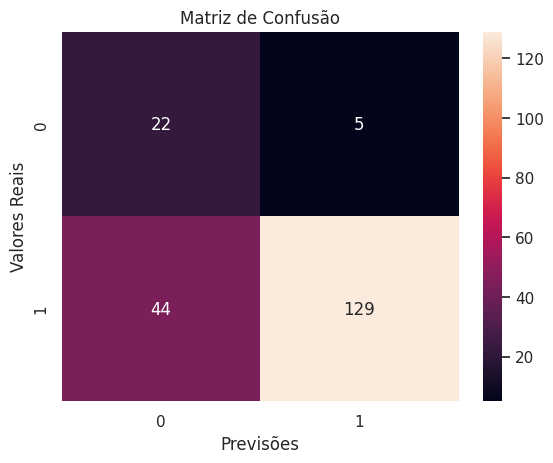

In [ ]:
cm = confusion_matrix(y_test_codes, y_pred_codes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_codes, y_pred_codes))

              precision    recall  f1-score   support

          -1       0.33      0.81      0.47        27
           0       0.96      0.75      0.84       173

    accuracy                           0.76       200
   macro avg       0.65      0.78      0.66       200
weighted avg       0.88      0.76      0.79       200



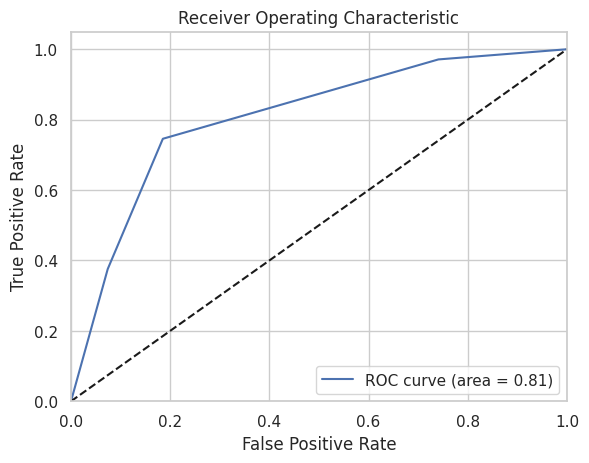

In [ ]:
from sklearn.metrics import roc_curve, auc


y_pred_proba = modelo_knn2.predict_proba(x_test_norm_imputed)


y_test_codes_adjusted = [1 if code == 0 else 0 for code in y_test_codes]

fpr, tpr, thresholds = roc_curve(y_test_codes_adjusted, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

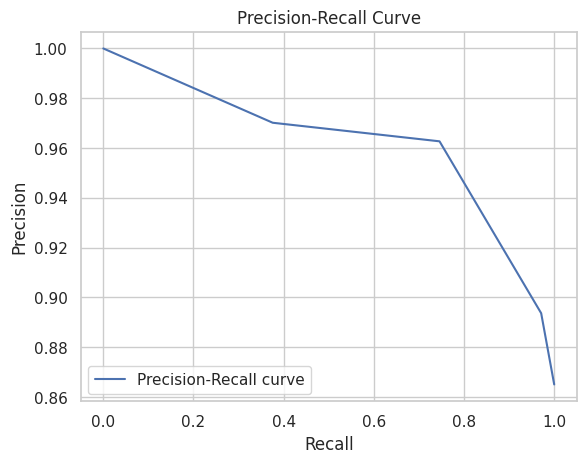

In [ ]:
from sklearn.metrics import precision_recall_curve


y_pred_proba = modelo_knn2.predict_proba(x_test_norm_imputed)


y_test_codes_adjusted = [1 if code == 0 else 0 for code in y_test_codes]

precision, recall, thresholds = precision_recall_curve(y_test_codes_adjusted, y_pred_proba[:, 1])

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()